# Matplotlib

**Matplotlib** is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python interpreter and IPython shell, the jupyter notebook, web application servers, and graphical user interface toolkits.

Matplotlib tries to make easy things easy and hard things possible. Although Matplotlib is written primarily in pure Python, it makes heavy use of NumPy and other extension code to provide good performance even for large arrays.

The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).

In this course we are not going to plot with matplotlib because we will use higher level libraries for plotting: seaborn and pandas. However since both of these libraries are built on top of matplotlib we need to aquire the basic terminology and concepts of matplotlib because frecuently we will need to make modifications to the objects and plots produced by those higher level libraries. Therefore this lesson is not a complete introduction to matplotlib, we will learn just enough so we can get started visualizing data.

# The basics concepts: figures, subplots (axes) and axis

Matplotlib is a large project and can seem daunting at first. However, by learning the components, it should begin to feel much smaller and more approachable.

**Anatomy of a "Plot"**

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):


<img src="img/figure_axes_axis_labeled.png", height='450px', width='450px'>

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) or **Subplot**. A **Subplot** is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. A **Subplot** object must belong to a *Figure* (and only one *Figure*). Most commands we will use be with respect to this **Subplots** object.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.  In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual ``Axis`` part of things all that much.  However, it's worth mentioning here to explain where the term ``Axes`` comes from.

# Examples using the Object Oriented Interface

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## pyplot

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current subplot.

## Object Oriented Interface

The advantage of keeping which subplot we're working with very clear in our code will is obvious when we start to have multiple axes in one figure. Because (according to the zen of Python) **explicit is better than implicit** I recommend working with the Object Oriented Interfase.

What you do when plotting with the object oriented interphase, is to create the objects and then call methods for every object to make changes specifically to that object. The `plt.subplots` function creates a figure object and an Subplot (Axes) object at the same time, then we can create a plot by calling methods on those objects.

In [4]:
x = np.linspace(-4,4)
y1, y2 = x**2, x**3

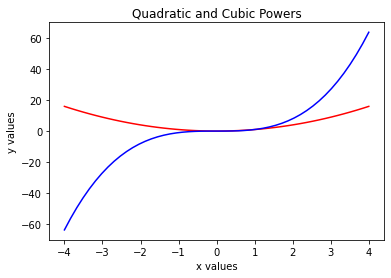

In [5]:
# Object Oriented Interface
fig, ax = plt.subplots()
ax.plot(x, y1, 'red')
ax.plot(x, y2, 'blue')
ax.set_title('Quadratic and Cubic Powers')
ax.set_xlabel('x values')
ax.set_ylabel('y values');

Interestingly, just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). For example, when calling `plt.xlabel("x label")`, *pyplot* calls `ax.set_xlabel("x label")` on whichever *Axes* is "current". Here is an equivalent version of the above example using just pyplot.

The usefulness of the OOI is clearer when working with multiple subplots in one figure. We've mentioned before that a figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

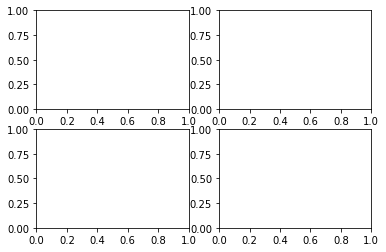

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2)

`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure. Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods. For example:

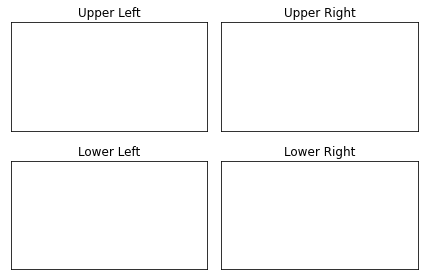

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set_title('Upper Left')
axes[0,1].set_title('Upper Right')
axes[1,0].set_title('Lower Left')
axes[1,1].set_title('Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])

fig.tight_layout();

### Example: Creating a figure showing the shape of the power functions.

In [8]:
x = np.linspace(start=-5, stop=5, num=150)

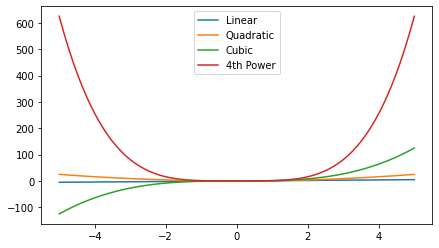

In [9]:
# All functions in one axes
fig, ax = plt.subplots(figsize = (7,4))
ax.plot(x, x, label='Linear')
ax.plot(x, x**2,  label='Quadratic')
ax.plot(x, x**3, label='Cubic')
ax.plot(x, x**4, label='4th Power')
ax.legend();

What if we want to take a look at the first 10 powers of x?

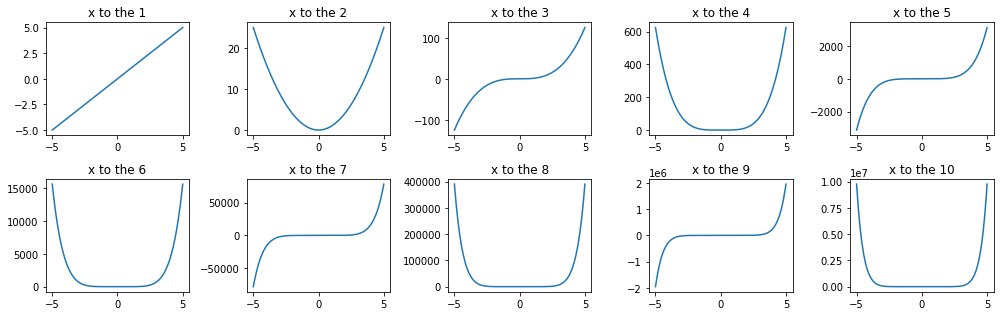

In [10]:
# A more elegant approach
fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (14,4.5))
for i, ax in enumerate(axes.flatten()):
    ax.set_title("x to the {:d}".format(i+1))
    ax.plot(x, x**(i+1))
    
fig.tight_layout();

# Common customization: colors, labels, ticks, tickmarks, limits and annotations

Now we are going to see how to change some of the elements of a plot. Matplotlib allows the user to customize almost every element of a plot. However there are some elements that we change more ofter, those are the ones that we review here.

In [11]:
# Generating data
x = np.linspace(-np.pi, np.pi, 200)
sine, cosine = np.sin(x), np.cos(x)

In this section we will go from this simple plot:

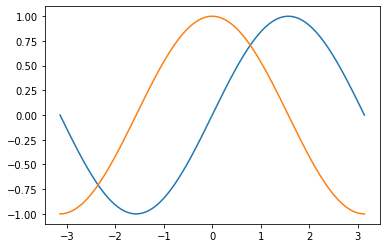

In [12]:
fig, ax = plt.subplots()
ax.plot(x, sine, x, cosine);

to this plot:

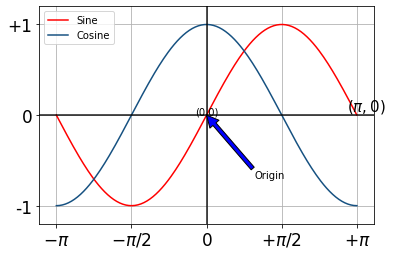

In [13]:
fig, ax = plt.subplots()
ax.plot(x, sine, color='red', label='Sine')
ax.plot(x, cosine, color='#165181', label='Cosine')

ax.set_xlim(-3.5,3.5)
ax.set_ylim(-1.2,1.2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1,0,1])

ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], size=17)
ax.set_yticklabels(['-1','0','+1'], size=17)

ax.legend(loc='upper left')

ax.text(-0.25,0,'(0,0)') # x coord, y coord, 
ax.text(np.pi-0.2,0.05, r'$(\pi,0)$', size=15)

ax.annotate('Origin',
            xy=(0, 0), # where the arrow points to
            xytext=(1, -0.7), # location of text
            arrowprops=dict(facecolor='blue'));

ax.axhline(0, color='black', alpha=0.9) #horizontal line
ax.axvline(0, color='black', alpha=0.9) #vertical
ax.grid();

## Colors
In the previous parts, you learned how matplotlib organizes plot-making by figures and axes. We broke down the components of a basic figure and learned how to create them. This section will go over some of the properties that are used throughout the library, especially those that tend to be used more often. 

Given that matplotlib is a plotting library, colors are associated with everything that is plotted in your figures. Matplotlib supports a [very robust language](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) for specifying colors that should be familiar to a wide variety of users.

### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse" are valid. See the [full list](http://www.w3schools.com/html/html_colornames.asp) of the 147 colornames.

### Hex values
Colors can also be specified by supplying an HTML/CSS hex string, such as `'#0000FF'` for blue.

### 256 Shades of Gray
A gray level can be given instead of a color by passing a string representation of a number between 0 and 1, inclusive. `'0.0'` is black, while `'1.0'` is white. `'0.75'` would be a lighter shade of gray.

### RGB[A] tuples
You may come upon instances where the previous ways of specifying colors do not work. This can sometimes happen in some of the deeper, stranger levels of the code. When all else fails, the universal language of colors for matplotlib is the RGB[A] tuple. This is the "Red", "Green", "Blue", and sometimes "Alpha" tuple of floats in the range of [0, 1]. One means full saturation of that channel, so a red RGBA tuple would be `(1.0, 0.0, 0.0, 1.0)`, whereas a partly transparent green RGBA tuple would be `(0.0, 1.0, 0.0, 0.75)`.  The documentation will usually specify whether it accepts RGB or RGBA tuples. Sometimes, a list of tuples would be required for multiple colors, and you can even supply a Nx3 or Nx4 numpy array in such cases.

In functions such as `plot()` and `scatter()`, while it may appear that they can take a color specification, what they really need is a "format specification", which includes color as part of the format. Unfortunately, such specifications are string only and so RGB[A] tuples are not supported for such arguments (but you can still pass an RGB[A] tuple for a "color" argument).

Note, oftentimes there is a separate argument for "alpha" where-ever you can specify a color. The value for "alpha" will usually take precedence over the alpha value in the RGBA tuple. There is no easy way around this problem.

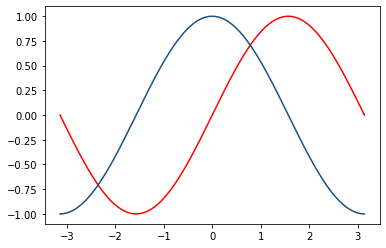

In [14]:
fig, ax = plt.subplots()
ax.plot(x, sine, color='red')
ax.plot(x, cosine, color='#165181');

## Setting axis limits

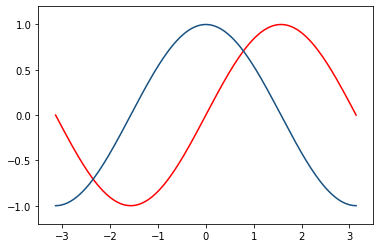

In [15]:
fig, ax = plt.subplots()
ax.plot(x, sine, color='red')
ax.plot(x, cosine, color='#165181')
ax.set_xlim(-3.5,3.5)
ax.set_ylim(-1.2,1.2);

## Setting ticks and tick labels

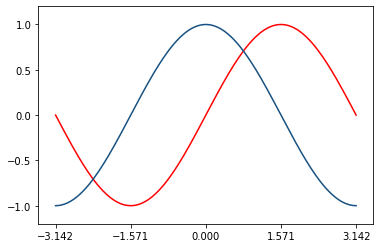

In [16]:
fig, ax = plt.subplots()
ax.plot(x, sine, color='red')
ax.plot(x, cosine, color='#165181')

ax.set_xlim(-3.5,3.5)
ax.set_ylim(-1.2,1.2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks(np.arange(-1,1.1,0.5));

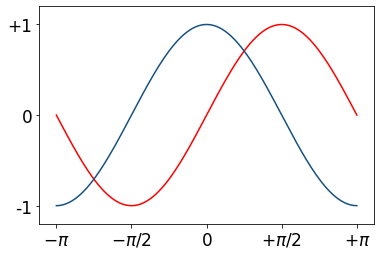

In [17]:
fig, ax = plt.subplots()
ax.plot(x, sine, color='red')
ax.plot(x, cosine, color='#165181')

ax.set_xlim(-3.5,3.5)
ax.set_ylim(-1.2,1.2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1,0,1])

ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], size=17)
ax.set_yticklabels(['-1','0','+1'], size=17);

## Legend

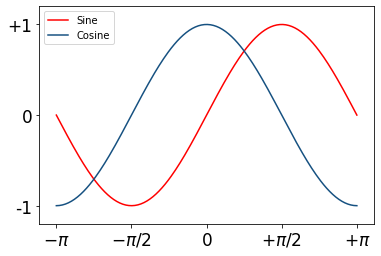

In [18]:
fig, ax = plt.subplots()
ax.plot(x, sine, color='red', label='Sine')
ax.plot(x, cosine, color='#165181', label='Cosine')

ax.set_xlim(-3.5,3.5)
ax.set_ylim(-1.2,1.2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1,0,1])

ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], size=17)
ax.set_yticklabels(['-1','0','+1'], size=17)

ax.legend(loc='upper left');

## Anotations

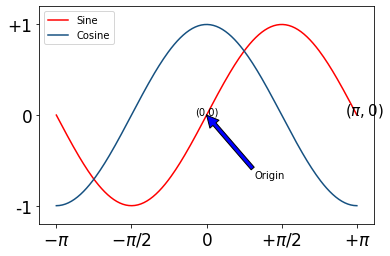

In [19]:
fig, ax = plt.subplots()
ax.plot(x, sine, color='red', label='Sine')
ax.plot(x, cosine, color='#165181', label='Cosine')

ax.set_xlim(-3.5,3.5)
ax.set_ylim(-1.2,1.2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1,0,1])

ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], size=17)
ax.set_yticklabels(['-1','0','+1'], size=17)

ax.legend(loc='upper left')

ax.text(-0.25,0,'(0,0)') # x coord, y coord, 
ax.text(np.pi-0.25,0, r'$(\pi,0)$', size=15)

ax.annotate('Origin',
            xy=(0, 0), # where the arrow points to
            xytext=(1, -0.7), # location of text
            arrowprops=dict(facecolor='blue'));

## Grids, horizontal and vertical lines

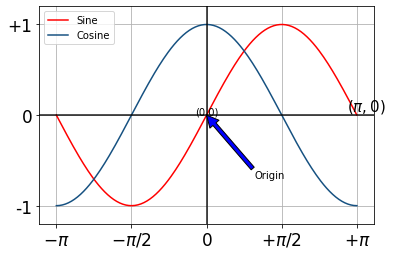

In [20]:
fig, ax = plt.subplots()
ax.plot(x, sine, color='red', label='Sine')
ax.plot(x, cosine, color='#165181', label='Cosine')

ax.set_xlim(-3.5,3.5)
ax.set_ylim(-1.2,1.2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1,0,1])

ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], size=17)
ax.set_yticklabels(['-1','0','+1'], size=17)

ax.legend(loc='upper left')

ax.text(-0.25,0,'(0,0)') # x coord, y coord, 
ax.text(np.pi-0.2,0.05, r'$(\pi,0)$', size=15)

ax.annotate('Origin',
            xy=(0, 0), # where the arrow points to
            xytext=(1, -0.7), # location of text
            arrowprops=dict(facecolor='blue'));

ax.axhline(0, color='black', alpha=0.9) #horizontal line
ax.axvline(0, color='black', alpha=0.9) #vertical
ax.grid();

**Attribution** This notebook is partially based on:

- Anatomy of Matplotlib Tutorial, by Benjamin Root, available on [github](https://github.com/WeatherGod/AnatomyOfMatplotlib)